In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl

import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

In [2]:
def RK4(X0, t0, dt, func): # actualiza un pasito
    k1 = dt * func(X0, t0)
    k2 = dt * func(X0+k1/2, t0+dt/2)
    k3 = dt * func(X0+k2/2, t0+dt/2)
    k4 = dt * func(X0+k3, t0 + dt)
    return X0 + (k1+2*k2+2*k3+k4)/6

In [21]:
# Oscilador armonico forzado
# d^2x/dt^2 = -omega^2*x+F(t)
# X = (x, v)
# dX/dt = (v, -omega^2*x+F(t)) === F(X, t)
# Solo necesito las condiciones iniciales....
# de X = (x0, v0)
omega2 = 1
f = lambda t: 2 * np.cos(3*t-2)
def F(X, t): # la derivada de X con respecto a t
    global omega2
    global f
    # X = (x, v)
    return np.array([X[1], -omega2*X[0]+f(t)])

dt = 0.0001
t = np.arange(0,30.,dt)
y0 = np.array([0,0]) # limitacion <-
y_temp = y0
y = []
for idx,_t in enumerate(t):
    if idx == 0:
        y.append(y_temp.copy())
    else:
        # y_temp = y_n-1
        y_temp = RK4(y_temp, _t, dt, F)
        # y_temp = y_n
        y.append(y_temp.copy())
y = np.array(y)

In [22]:
x = y[:,0] # posiciones
v = y[:,1] # velocidades

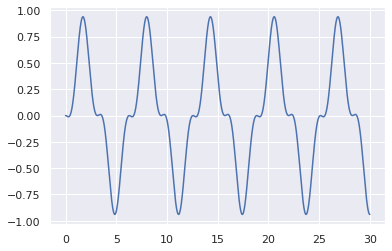

In [23]:
plt.plot(t, x)